## Churn Modeling
https://www.kaggle.com/datasets/kukuroo3/churn-model-data-set-competition-form/code

### Import library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

### Load churn data

In [2]:
churn_df = pd.read_csv("Churn_Modelling.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
churn_df.CustomerId.nunique()

10000

In [5]:
features = churn_df.columns[:-1]
target = churn_df.columns[-1]
print("Features : " + features)
print("Target : " + target)

Index(['Features : RowNumber', 'Features : CustomerId', 'Features : Surname',
       'Features : CreditScore', 'Features : Geography', 'Features : Gender',
       'Features : Age', 'Features : Tenure', 'Features : Balance',
       'Features : NumOfProducts', 'Features : HasCrCard',
       'Features : IsActiveMember', 'Features : EstimatedSalary'],
      dtype='object')
Target : Exited


### Drop unnecessary data

In [6]:
churn_df = churn_df.drop(labels = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)

### Encoding categorical data

In [7]:
ohe = OneHotEncoder(sparse=False).fit(X = churn_df[['Geography']])
churn_df[ohe.categories_[0]] = ohe.transform(churn_df[['Geography']])

In [8]:
ohe = OneHotEncoder(sparse=False).fit(X = churn_df[['Gender']])
churn_df[ohe.categories_[0]] = ohe.transform(churn_df[['Gender']])

In [9]:
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [10]:
churn_df = churn_df.drop(columns=['Geography', 'Gender'])

In [11]:
churn_df = churn_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Germany',
       'Spain', 'Female', 'Male', 'Exited']]

In [12]:
churn_df = churn_df.drop(columns=['Female', 'Spain'])

### Check feature data

In [13]:
churn_df.nunique()

CreditScore         460
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
France                2
Germany               2
Male                  2
Exited                2
dtype: int64

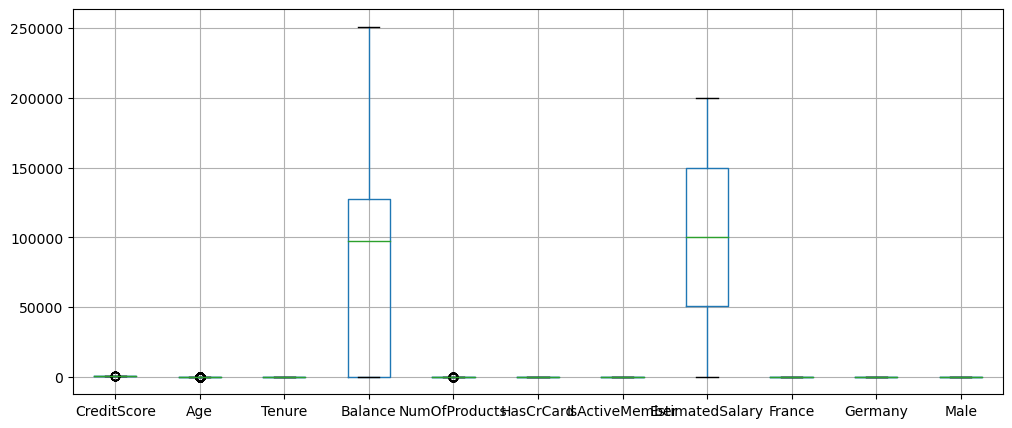

In [14]:
plt.figure(figsize=(12, 5))
churn_df.iloc[:, :-1].boxplot()
plt.show()

In [15]:
churn_df.iloc[:, :-1].skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
France            -0.005601
Germany            1.149340
Male              -0.183596
dtype: float64

<AxesSubplot:>

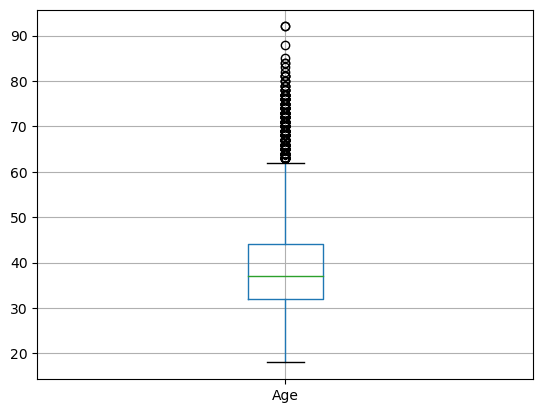

In [16]:
churn_df.boxplot(column=['Age'])

### Split train and test data

In [17]:
train_df, test_df = train_test_split(churn_df, train_size = 0.7, random_state=123)

### Data Scaling

In [18]:
ss_train = train_df.copy()
ss_test = test_df.copy()
ss_features = ['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler().fit(train_df[ss_features])
ss_train[ss_features] = scaler.transform(train_df[ss_features])
ss_test[ss_features] = scaler.transform(test_df[ss_features])

### Setup Modeling

In [19]:
model = DecisionTreeClassifier().fit(ss_train.iloc[:, :-1], ss_train[target])
pred = model.predict(ss_test.iloc[:, :-1])

### Evaluate model

In [20]:
print(f1_score(ss_test[target], pred))

0.5281522601110229


In [21]:
print(accuracy_score(ss_test[target], pred))

0.8016666666666666


In [22]:
print(classification_report(ss_test[target], pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2395
           1       0.51      0.55      0.53       605

    accuracy                           0.80      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.80      0.80      3000

